## Pump Curve Code 

This code finds the pump curve for the pump used 

In [2]:
#imports 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import datetime
import pathlib
from datetime import datetime
from dataclasses import dataclass
import math
import scipy

the equation of the pump curve is -0.004119318181818178Q^2 + -0.1330681818181824Q + 245.33636363636367 


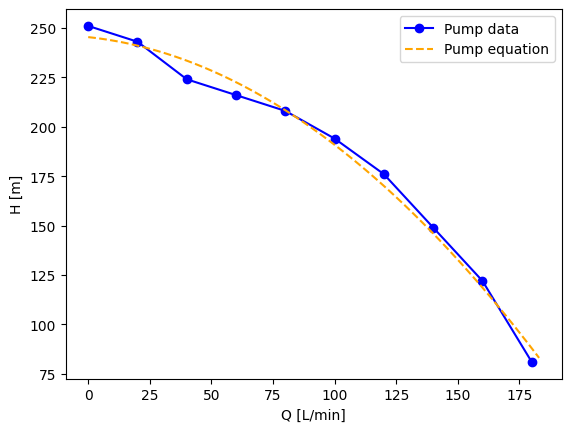

In [3]:
# pump data 

#Pump data from catalogue --> 4SD7/27 from (https://www.ochoa.com.do/media/pdf/03-04-5415-5416-5417-5418-5419.pdf)
Q = [0,20,40,60,80,100,120,140,160,180] #L/min
H = [251,243,224,216,208,194,176,149,122,81] #m
plt.plot(Q,H, color='blue', label='Pump data', marker='o')

#Find equation of pump curve 
a, b,c = np.polyfit(Q, H, 2)
print(f"the equation of the pump curve is {a}Q^2 + {b}Q + {c} ")

#Graphing pump equation
xs = np.linspace(0, 183, 100)
ys = a*(xs**2) + b*(xs) + c
plt.plot(xs, ys, linestyle='dashed', color='orange', label='Pump equation')
plt.xlabel('Q [L/min]')
plt.ylabel('H [m]')
plt.legend()
plt.show()




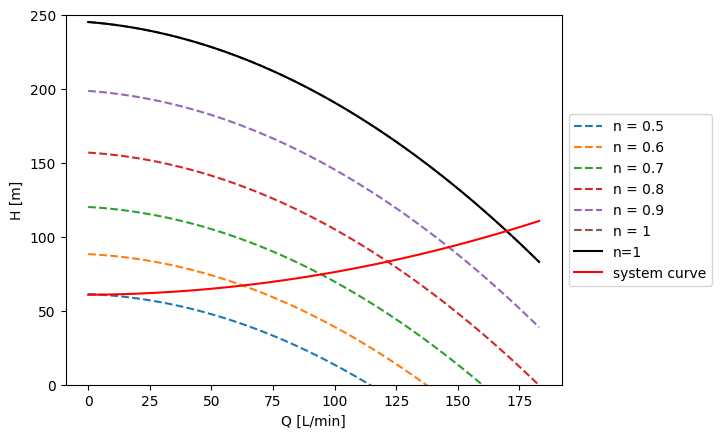

In [4]:
#Variable speed pump curve

n = [0.5,0.6,0.7,0.8,0.9,1] #nominal speed over actual speed of pump [RPM/RPM]


H_variable = [] #intiate empty list to add to
Q_OperationPoints = [] 
H_OperationPoints = []

def f(x): 
    return (a*(x**2) + b*(x)*n[i] + c*(n[i]**2)- (0.0014378405986266312*x**2 + 0.009691031163810078*x + 60.84508355565693))

for i in range (len(n)):
    H_variable.append( a*(xs**2) + b*(xs)*n[i] + c*(n[i]**2))
    plt.plot(xs, H_variable[i], linestyle='dashed', label=f'n = {n[i]}')
    Q_OperationPoints.append(sp.optimize.brentq( f,0,175))
    H_OperationPoints.append(0.0014378405986266312*Q_OperationPoints[i]**2 + 0.009691031163810078*Q_OperationPoints[i] + 60.84508355565693) 

ax = plt.plot(xs, ys, color='black', label='n=1')

H_system = 0.0014378405986266312*xs**2 + 0.009691031163810078*xs + 60.84508355565693 #3Ha system curve
plt.plot(xs, H_system, color='red', label='system curve')
plt.xlabel('Q [L/min]')
plt.ylabel('H [m]')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,250)
plt.show()




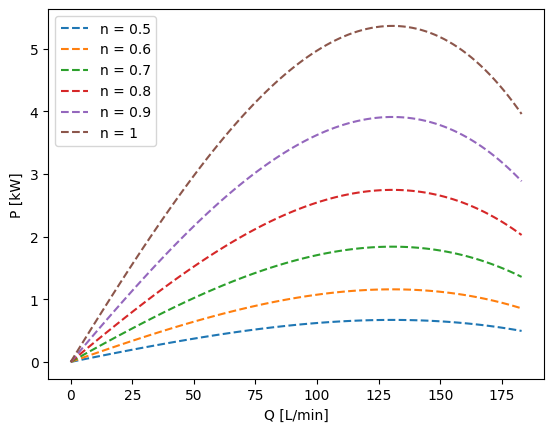

In [5]:

#efficiency of pump curve
Q_nominal = 120 / (60*1000) #m3/s
H_nominal = 176 #m
P_nominal = 5.5 * 1000 #W
rho = 1000 #kg/m3
g = 9.81 #m/s2
eff_pump = (Q_nominal*H_nominal*rho*g)/ (P_nominal) 

#Assuming constant efficiency of the pump 
P_pump = ((xs/(60*1000)) * ys * rho * g)/ (eff_pump * 1000) #kW

#plt.plot(xs, P_pump, color='purple', label='Pump power')

P_variable = [] 
P_OperationPoints = []
for i in range (len(n)):
    P_variable.append(P_pump/(n[i]**-3))
    P_OperationPoints.append(((Q_OperationPoints[i]/(60*1000))*H_OperationPoints[i]*rho*g)/(eff_pump * 1000*n[i]**(-3)))
    plt.plot(xs, P_variable[i], linestyle='dashed', label=f'n = {n[i]}')
plt.xlabel('Q [L/min]')
plt.ylabel('P [kW]')
plt.legend()
plt.show()





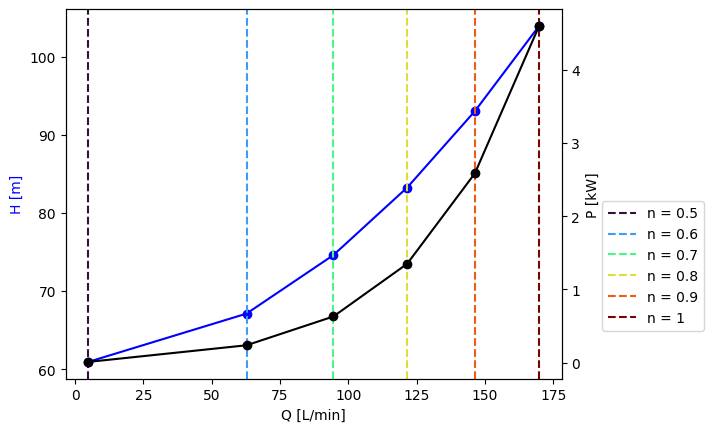

In [6]:
#Operational point graph 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Q_OperationPoints, H_OperationPoints,  marker='o', color = 'blue')
ax1.set_xlabel('Q [L/min]')
ax1.set_ylabel('H [m]', color='blue')
ax2.plot(Q_OperationPoints, P_OperationPoints,  marker='o', color = 'black')
ax2.set_ylabel('P [kW]', color='black')

colors = cm.turbo(np.linspace(0, 1, len(Q_OperationPoints)))
for i in range (len(Q_OperationPoints)):
    ax1.axvline(Q_OperationPoints[i], linestyle='dashed', label=f'n = {n[i]}', color = colors[i])
    
ax1.legend(bbox_to_anchor=(1.3, 0.5))
plt.show()




In [7]:
#Find Q vs P curve equation  for 1ha plantain system 

Q_op_m3 = [x/(60 * 1000) for x in Q_OperationPoints] #Q_op in m3/s
eq = np.polyfit(Q_op_m3, P_OperationPoints, 3)
print(f"the equation of the pump curve is {eq[0]}Q^3 + {eq[1]}Q^2 + {eq[2]}Q + {eq[3]}")


the equation of the pump curve is 445687894.591783Q^3 + -984696.5871017637Q^2 + 854.0710206707552Q + -0.05692714507987253


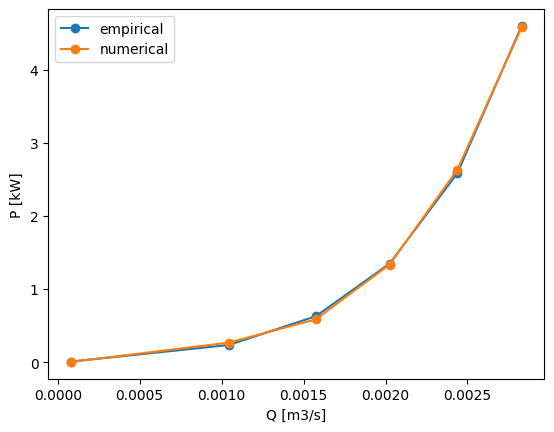

In [8]:
plt.plot(Q_op_m3, P_OperationPoints, label='empirical', marker = 'o')
plt.plot(Q_op_m3, eq[0]*np.array(Q_op_m3)**3 + eq[1]*np.array(Q_op_m3)**2 + eq[2]*np.array(Q_op_m3) + eq[3], label= 'numerical', marker = 'o')
plt.xlabel('Q [m3/s]')
plt.ylabel('P [kW]')
plt.legend()

In [9]:
eq[0]*np.array(Q_op_m3[0])**3 + eq[1]*np.array(Q_op_m3[0])**2 + eq[2]*np.array(Q_op_m3[0]) + eq[3]

0.004878281135519476

# Considering the tank at height of 20 meters (inlet)
 + what is the pump operation curve (P vs Q) considering variable speed operation 

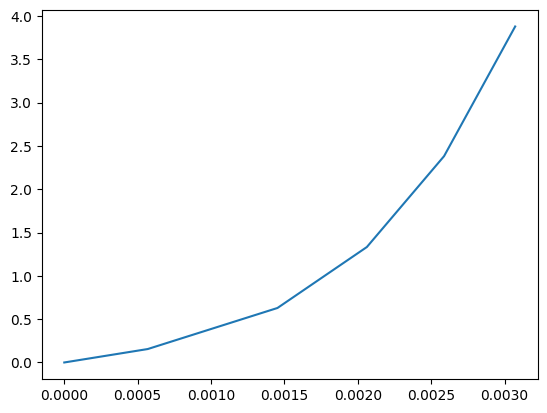

In [39]:
# Total head: 80.8 m (static)


def func_root_head(a,b,c, n, Q):
    return a*Q**2 + b*n*Q + c * n**2 - 80.8

Q_root = []
for i in n:
   sol =  scipy.optimize.root_scalar(lambda x: func_root_head(a, b, c, i ,x), x0 = 0 )
   Q_root.append(sol.root) #in L/min

Q_root_m3 = [x/(60 * 1000) for x in Q_root] #Q_op in m3/s

if Q_root_m3[0] < 0:
    Q_root_m3[0] = 0
 

P_root =  [(q * 80.8 * rho * g) / (eff_pump * 1000 * n[i]**(-3)) for i, q in enumerate(Q_root_m3)]


plt.plot(Q_root_m3, P_root)

In [40]:
eq_1 = np.polyfit(Q_root_m3, P_root, 3)

print(f"the equation of the pump curve is {eq_1[0]}Q^3 + {eq_1[1]}Q^2 + {eq_1[2]}Q + {eq_1[3]} for a constant H_static of 80.8m")

the equation of the pump curve is 152054186.35597843Q^3 + -172700.38396421436Q^2 + 357.18109285749836Q + -0.005691445084420055 for a constant H_static of 80.8m


In [42]:
Q_root_m3

[0,
 0.0005687273532064945,
 0.001452710954558271,
 0.0020618786320054355,
 0.0025880168078103675,
 0.003072606294153521]

# 2ha Pump curve 

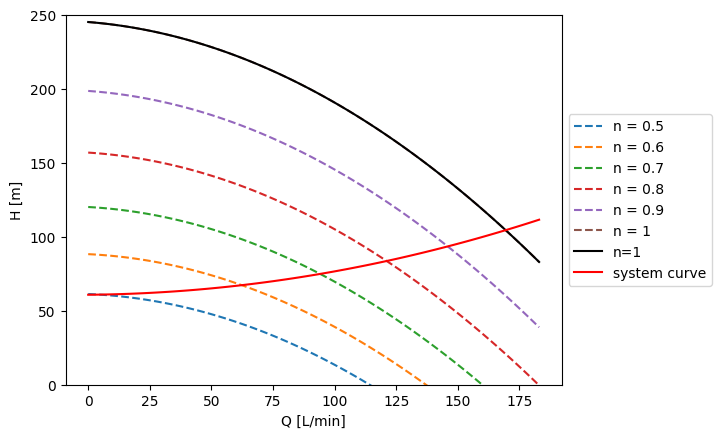

In [44]:
#Variable speed operation 

#Variable speed pump curve

n = [0.5,0.6,0.7,0.8,0.9,1] #nominal speed over actual speed of pump [RPM/RPM]


H_variable = [] #intiate empty list to add to
Q_OperationPoints = [] 
H_OperationPoints = []

#From DripNetwork.ipynb --> 0.0014811456560022407Q^2 + 0.014248741431001915Q + 60.86187954841651
def f(x): 
    return (a*(x**2) + b*(x)*n[i] + c*(n[i]**2)- (0.001481145656002240*x**2 + 0.014248741431001915*x + 60.86187954841651))

for i in range (len(n)):
    H_variable.append( a*(xs**2) + b*(xs)*n[i] + c*(n[i]**2))
    plt.plot(xs, H_variable[i], linestyle='dashed', label=f'n = {n[i]}')
    Q_OperationPoints.append(sp.optimize.brentq( f,0,175))
    H_OperationPoints.append(0.0014811456560022407*Q_OperationPoints[i]**2 + 0.014248741431001915*Q_OperationPoints[i] + 60.86187954841651) 

ax = plt.plot(xs, ys, color='black', label='n=1')

H_system = 0.0014378405986266312*xs**2 + 0.014248741431001915*xs + 60.86187954841651 #3Ha system curve
plt.plot(xs, H_system, color='red', label='system curve')
plt.xlabel('Q [L/min]')
plt.ylabel('H [m]')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,250)
plt.show()

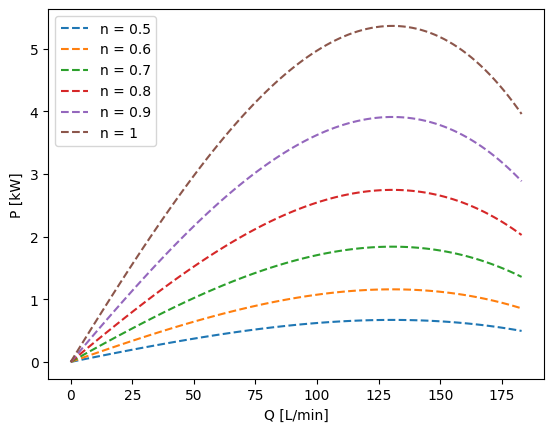

In [45]:
#efficiency of pump curve
Q_nominal = 120 / (60*1000) #m3/s
H_nominal = 176 #m
P_nominal = 5.5 * 1000 #W
rho = 1000 #kg/m3
g = 9.81 #m/s2
eff_pump = (Q_nominal*H_nominal*rho*g)/ (P_nominal) 

#Assuming constant efficiency of the pump 
P_pump = ((xs/(60*1000)) * ys * rho * g)/ (eff_pump * 1000) #kW

#plt.plot(xs, P_pump, color='purple', label='Pump power')

P_variable = [] 
P_OperationPoints = []
for i in range (len(n)):
    P_variable.append(P_pump/(n[i]**-3))
    P_OperationPoints.append(((Q_OperationPoints[i]/(60*1000))*H_OperationPoints[i]*rho*g)/(eff_pump * 1000*n[i]**(-3)))
    plt.plot(xs, P_variable[i], linestyle='dashed', label=f'n = {n[i]}')
plt.xlabel('Q [L/min]')
plt.ylabel('P [kW]')
plt.legend()
plt.show()

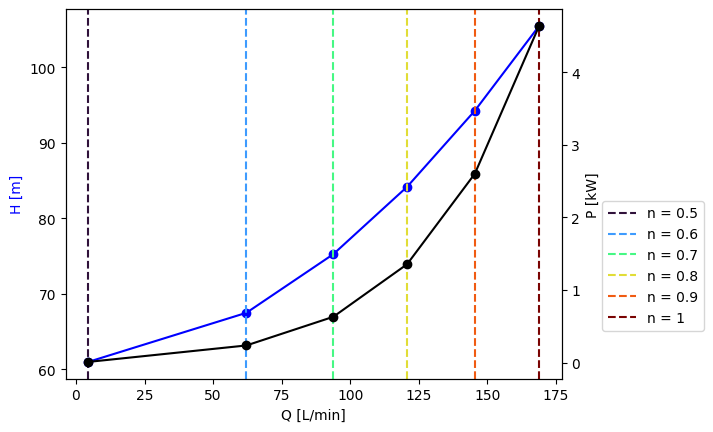

In [46]:
#Operational point graph 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Q_OperationPoints, H_OperationPoints,  marker='o', color = 'blue')
ax1.set_xlabel('Q [L/min]')
ax1.set_ylabel('H [m]', color='blue')
ax2.plot(Q_OperationPoints, P_OperationPoints,  marker='o', color = 'black')
ax2.set_ylabel('P [kW]', color='black')

colors = cm.turbo(np.linspace(0, 1, len(Q_OperationPoints)))
for i in range (len(Q_OperationPoints)):
    ax1.axvline(Q_OperationPoints[i], linestyle='dashed', label=f'n = {n[i]}', color = colors[i])
    
ax1.legend(bbox_to_anchor=(1.3, 0.5))
plt.show()

In [48]:
#Find Q vs P curve equation  for 2ha plantain system 

Q_op_m3 = [x/(60 * 1000) for x in Q_OperationPoints] #Q_op in m3/s
eq = np.polyfit(Q_op_m3, P_OperationPoints, 3)
print(f"the equation of the pump curve is {eq[0]}Q^3 + {eq[1]}Q^2 + {eq[2]}Q + {eq[3]}")

the equation of the pump curve is 457464099.7859799Q^3 + -1002598.6831058152Q^2 + 859.5461108664946Q + -0.054389800267633744
